## Der $k$-Means-Algorithmus

In diesem Notebook wenden wir den $k$-Means-Algorithmus auf einen Datensatz eines (fiktiven) Online-Shops an. Er enthält das Einkommen (engl. _income_) und einen Score für die Ausgaben (engl. _spending_, mit Werten von _1 wenig_ bis _100 viel_) von Kundinnen und Kunden.

Zunächst importieren wir die Programmbibliotheken `pandas` und `matplotlib`. 

<b>Neu dazu kommt die Klasse `KMeans` aus scikit-learn. Diese verwenden wir für den $k$-Means-Algorithmus.</b>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

<div class="alert alert-box alert-success">
    
## Aufgabe 1 - Datensatz einlesen

Erstelle eine Variable mit dem Namen `customers` indem Du mit pandas die Datei `customers.csv` einliest. Überprüfe mit `head()`, ob das Einlesen geklappt hat.

</div>

In [3]:
customers = pd.read_csv('customers.csv')
customers.head()

customerID  gender  age  income  spending
0           1    Male   19      15        39
1           2    Male   21      15        81
2           3  Female   20      16         6
3           4  Female   23      16        77
4           5  Female   31      17        40

Da wir uns nur für das Einkommen und die Ausgaben interessieren, können wir die restlichen Spalten aus dem Datensatz entfernen. Das geht mit dem Befehl `drop`. Beispielsweise ist folgender Ausdruck ein neues Dataframe, basierend auf das Dataframe `tips`, wobei die Spalten `size` und `time` entfernt wurden:
```python
tips.drop(columns=['size','time'])
``` 

<div class="alert alert-box alert-success">
    
## Aufgabe 2 - Datensatz reduzieren

* Lösche alle Spalten aus dem Dataframe `customers` bis auf `income` und `spending`.
* Speichere das Ergebnis erneut in die Variable `customers` (sie wird dadurch überschrieben)
* Kontrolliere mit `customers.head()` ob Dein Dataframe (neben dem Index) nur noch die oben genannten zwei Spalten beinhaltet.

</div>

In [4]:
customers = customers.drop(columns=['customerID','gender','age'])
customers.head()

income  spending
0      15        39
1      15        81
2      16         6
3      16        77
4      17        40

Als Vorbereitung für den $k$-Means Algorithmus müssen wir einen Wert für $k$, die Anzahl Cluster, definieren. Wir starten mit $k$=2 :

In [5]:
k=2

Die restlichen Schritte des $k$-Means-Algorithmus werden mit dem Objekt `KMeans` der python-Bibliothek `sklearn` ausgeführt, die wir weiter oben importiert haben. Beim Aufruf müssen wir die folgenden Schlüsselwort-Argumente übergeben:

* `n_clusters`: Die Anzahl Clusters $k$
* `random_state`: Eine beliebige Zahl zur Initialisierung des zufälligen Wahl der Anfangs-Schwerpunkte. Der genaue Wert ist nicht entscheidend. Dadurch, dass wir einen bestimmten Wert setzen, können wir den Algorithmus mehrmals ausführen und immer die gleichen Resultate dabei erzielen. Dieses Prinzip kennen wir bereits aus dem `seed()`-Befehl aus der `random` Bibliothek.
* `n_init` : Da eine ungünstige Wahl der anfänglichen Schwerpunkte zu einem schlechten Ergebnis führen kann, ist `KMeans` so programmiert, dass es den Algorithmus mehrmals mit verschiedenen Anfangs-Schwerpunkten ausführt, und das beste der dabei entstandenen Clusterings behält. Ein üblicher Wert für diesen Parameter wäre z.B. `10`.

<div class="alert alert-box alert-success">

## Aufgabe 3: Den $k$-Means-Algorithmus ausführen

* Erstelle eine Variable mit dem Namen `kmeans` und als Wert `KMeans(...)` wobei die oben genannten Parameter so gesetzt werden, dass die zufällige Wahl der Anfangsschwerpunkten festgelegt wurde und $k$ (momentan 2) Clusters erstellt werden.
* Um den $k$-Means-Algorithmus auszuführen, rufen wir auf der Instanz (Objekt) `kmeans` die Methode `fit()` auf und übergeben ihr als Argument den zu gruppierenden Datensatz. Rufee diesen Befehl so auf, dass der Datensatz `customers` gruppiert wird.

</div>

In [19]:
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(customers)

KMeans(n_clusters=2, n_init=10, random_state=42)

Nach der Ausführung des Befehls `fit()` hat der Algorithmus $k$ (d.h. zwei) Schwerpunkte definiert und jeden Datenpunkt seinem nächstgelegenen Schwerpunkt zugewiesen. Anschliessend hat er den **Within-Cluster sum of squares** (WCSS) Wert berechnet.

Diese Informationen können wir wie folgt auslesen:

#### Attribut 1: `cluster_centers_`

Im Attribut `cluster_centers_` findet man die Koordinaten der Cluster-Schwerpunkte. Jede innere Liste enthält die $x$- und $y$-Koordinate eines Schwerpunkts. Z.B. könnte für 3 Schwerpunkte das Ergebnis wie folgt aussehen :

```python
[[13, 200],  # <-- Schwerpunkt von Cluster 1
 [323, 393], # <-- Schwerpunkt von Cluster 2
 [34, 527]   # <-- Schwerpunkt von Cluster 3
  # usw.
]
```

#### Attribut 2: `inertia_`

Im Attribut `inertia_` (englisch *inertia* = Trägheit) findet man zudem den **WCSS-Wert** des eben durchgeführten Clusterings, also die Summe aller quadrierten Abstände zwischen den Datenpunkten und ihren Schwerpunkten. Je kleiner dieser Wert ist, desto kompakter sind die Clusters.

<div class="alert alert-box alert-success">

## Aufgabe 4 - Schwerpunkte und WCSS auslesen

Lesee aus `kmeans` die Koordinaten und den WCSS-Wert aus, und trage diese unten ein.
</div>

In [7]:
kmeans.cluster_centers_

array([[79.6       , 50.12727273],
       [37.28888889, 50.28888889]])

In [8]:
kmeans.inertia_

181363.59595959607

**Antwort**:
* (x,y)-Koordinaten von Schwerpunkt 1 : (79.6, 50.1)
* (x,y)-Koordinaten von Schwerpunkt 2 : (37.3, 50.3)
* WCSS-Wert : 181363

Eine naheliegende Frage wäre: könnten wir mit $k=3$ ein besseres Clustering erzielen? Anders gesagt: wird der Wert von WCSS _tiefer_, wenn wir den Wert von $k$ von 2 auf 3 erhöhen?

<div class="alert alert-box alert-success">

## Aufgabe 5 - Clustering mit $k=3$

* Setze $k=3$ und erstelle eine Variable `kmeans3`, indem Du beim Aufruf von `KMeans` die entsprechenden Werte für die Argumente mitgibst.
* Führe `kmeans3.fit(customers)` nochmals aus und entscheide, ob dieses Clustering besser ist als das bei $k=2$.

</div>

In [9]:
kmeans3 = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans3.fit(customers)
print(kmeans3.cluster_centers_)
print(kmeans3.inertia_)

[[87.         18.63157895]
 [86.53846154 82.12820513]
 [44.15447154 49.82926829]]
106348.37306211119


**Antwort**
* Der WCSS-Wert für $k=3$ ist : 106348.37306211119
* Von den zwei Clusters war das für $k=...$ besser (2 oder 3 eintragen) :  3

Es ist nicht erstaunlich, dass eine grössere Anzahl an Cluster einen tieferen WCSS Wert liefert. Den tiefsten WCSS Wert bekommt man sogar, wenn man so viele Cluster definiert, dass jeder Datenpunkt sein eigenes Cluster bildet. So ein Clustering ist allerdings nichtsaussagend. Deswegen fragen wir uns, ab wann es sich nicht mehr lohnt eine grössere Anzahl von Clustern zu definieren, weil die Verbesserungen nur noch marginal werden. Das können wir mit der Ellenbogen-Methode herausfinden.

### Die Ellenbogen-Methode anwenden


Um die Ellenbogen-Methode anzuwenden, wenden wir zunächst nacheinenander den $k$-Means-Algorithmus für alle $k$-Werte zwischen 1 und 10 an und speichern nach jedem Durchlauf den $WCSS$-Wert in der Liste `wcss`. Zur Erinnerung:
* Eine leere Liste mit dem Namen `a` kann man in python mit `a = []` definieren.
* Mit `a.append(123)` kann man den Wert `123` der Liste `a` hinzufügen.

<div class="alert alert-box alert-success">

## Aufgabe 6
* Definiere eine Variable mit dem Namen `cluster_sizes` mit einer leeren Liste als Wert.
* Definiere eine Variable mit dem Namen `inertias` mit einer leeren Liste als Wert.
* Führe das Clustering für $k=2,3,\ldots,10$ mit Hilfe einer `for`-Schleife aus. Der Wert von $k$ durchläuft dabei die Werte $1$ bis $10$.
* Füge in jeder Iteration **pro Liste** einen Eintrag hinzu:
  * Der Wert von $k$ wird der Liste `cluster_sizes` hinzugefügt (**Tipp**: verwende den Befehl `append()`).
  * Der Wert von WCSS wird der Liste `inertias` hinzugefügt.
* Erstelle ein Dataframe mit dem Namen `wcssdf` mit folgendem Befehl `pd.DataFrame.from_dict({'k': cluster_sizes, 'inertia': inertias})`.
* Zeige mit `head()` die ersten Einträge dieses Dataframes, um sicherzustellen dass es funktioniert hat.
</div>

In [17]:
cluster_sizes = []
inertias = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42, n_init=10)
    kmeans.fit(customers)
    cluster_sizes.append(i)
    inertias.append(kmeans.inertia_)
wcssdf =  pd.DataFrame.from_dict({'k': cluster_sizes, 'inertia': inertias})
wcssdf.head()

k        inertia
0  1  270399.280000
1  2  181779.575758
2  3  106678.867499
3  4   73773.297461
4  5   44448.455448

<div class="alert alert-box alert-success">

## Aufgabe 7

Erstelle ein Liniendiagramm für das DataFrame `wcssdf`, d.h. mit $k$ als x-Achse und WCSS als $y$-Achse. Beschrifte die Achsen und setze den Titel `"Die Ellenbogen-Methode"`.

Verwende die folgenden matplotlib-Befehle:
* `dataframe.plot()`. Beispiel: `tips.plot(x='total_bill', y='tip')`: Ein Liniendiagramm für das Dataframe `tips` mit $x$-Koordinaten aus der Spalte `total_bill` und $y$-Koordinaten aus der Spalte `tip` erstellen. 
* `plt.title()`: Den Titel des Diagramms setzen
* `plt.xlabel()`: Die $x$-Achse beschriften
* `plt.ylabel()`: Die $y$-Achse beschriften
* `plt.show()`: Unnötige Ausgaben von Befehlen unterdrücken (am Ende aufrufen)

</div>

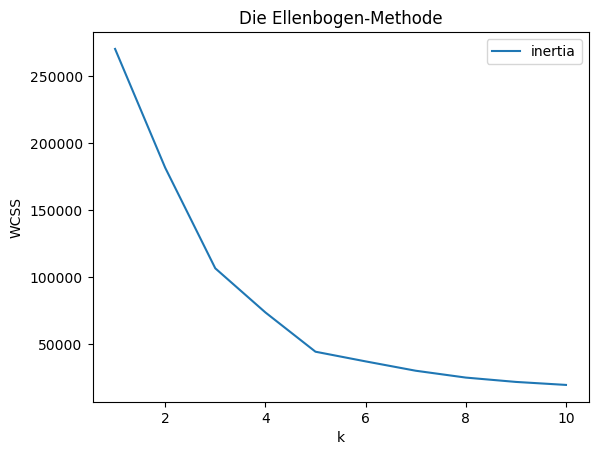

In [18]:
wcssdf.plot(x="k", y="inertia")
# plt.plot(wcssdf['k'], wcssdf['inertia'])
plt.title('Die Ellenbogen-Methode')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

<div class="alert alert-box alert-success">

## Aufgabe 8

Was ist gemäss der Ellenbogen-Methode die optimale Anzahl von Clustern?

</div>

**Antwort**: Der Knick ist bei $k=5$ am deutlichsten.

## Die Kategorien der Datenpunkte auslesen

Jetzt wo wir die optimale Anzahl von Clustern kennen, führen wir nochmals den $k$-Means-Algorithmus mit dem entsprechenden $k$ aus. Um für alle Punkte im Datensatz die entsprechende Kategorie zu bekommen, verwenden wir statt `fit()` die Methode `fit_predict()`. Diese gibt als Rückgabewert eine `ndarray`-Instanz zurück, die gleich viele Elemente hat wie der Datensatz Zeilen. Die Elemente sind natürliche Zahlen zwischen 0 und $k-1$, welche für die $k$ Cluster stehen. Das erste Element im `ndarray` entspricht folglich dem Cluster des ersten Datenpunktes, das zweite Element der Kategorie des zweiten Datenpunktes, usw.

<div class="alert alert-box alert-success">

## Aufgabe 9

* Führe den $k$-Means-Algorithmus mit der optimalen Anzahl von Clustern aus. 
* Weise danach (mit `fit_predict` statt `fit`) die Kategorien der Datenpunkte der Variablen `labels` zu und schreibe sie in die Ausgabe.
* Füge dem DataFrame `customers` die Spalte `cluster` hinzu, mit dem Wert `labels` (d.h. für jede Zeile des Dataframes, das entdeckte Cluster). Diese Spalte hat vorerst den Datentyp `int64`.
* Wandle die Spalte `cluster` in eine Spalte mit Datentyp `category` um. Du kannst dabei den alten Wert der Spalte `cluster` überschreiben.
</div>

In [16]:
kmeans = KMeans(n_clusters = 5, random_state = 42, n_init = 10)
labels = kmeans.fit_predict(customers)
customers['cluster'] = labels
customers['cluster'] = customers['cluster'].astype('category')

## Die Cluster visualisieren

Da wir nur zwei unabhängige Variablen haben, können wir die Cluster in einem zweidimensionalen Streudiagramm visualisieren. Um die Cluster dabei zu erkennen, können wir den Wert der Spalte `cluster` zur Färbung des jeweiligen Datenpunktes verwenden. Damit bekommen die Datenpunkte im gleichen Cluster die gleiche Farbe.

<div class="alert alert-box alert-success">

## Aufgabe 10

* Zeichne ein Streudiagramm aller Datenpunkte des DataFrames `customers`. Verwende folgende Parameter:
  * `x` : die Spalte `income`
  * `y` : die Spalte `spending`
  * `colormap` : `'rainbow'`
  * `c` : setze den Wert so, dass die Datenpunkte eine Farbe bekommen, je nach dem welchem Cluster sie gehören.

* Zeichne anschliessend die Cluster-Schwerpunkte ein. Verwende dafür die Farbe `gold`, die Punkt-Grösse (Parameter `s`) `200` sowie das Label (Parameter `label`) `"Schwerpunkte"`.

**Tipp**: um die $x$- und $y$-Werte der Schwerpunkte einzuzeichnen kannst Du folgenden Befehl vervollständigen, der die $x$- und $y$-Koordinaten der Schwerpunkte ausliest: 
```python
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],...
```

* Beschrifte schliesslich die Achsen und gib dem Diagramm den Titel `Kunden-Cluster`.
</div>

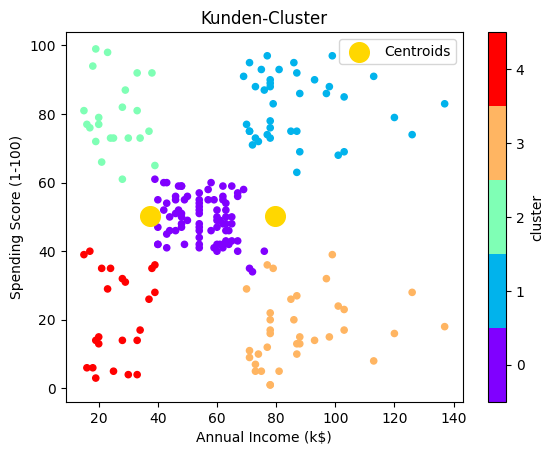

In [20]:
customers.plot.scatter(x='income',y='spending',c='cluster',colormap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'gold', label = 'Centroids')
plt.title('Kunden-Cluster')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()